Let's look at the catalogs generated by the corrected vs. uncorrected diffims...

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
import lsst.daf.persistence as dp
if False:
    butler=dp.Butler('decamDirTest')
    sources=butler.get('deepDiff_diaSrc',visit=289820,ccdnum=11)
    #print sources[0].extract('ip_diffim_Naive*')

if False:
# df1 will be the corrected one.
    df1 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
    #df1.head()

if False:
# df2 will be the corrected one.
    df2 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
    #df2.head()

# Now let's save them out...
if False:
    import cPickle
    import gzip
    cPickle.dump((df1, df2), gzip.GzipFile('twoCatalogs.p.gz', 'wb'))

In [6]:
import cPickle
import gzip

df1, df2 = cPickle.load(gzip.GzipFile('twoCatalogs.p.gz', 'rb'))
print df1.shape, df2.shape
#print df1.columns.values

(47, 133) (143, 133)


143 143


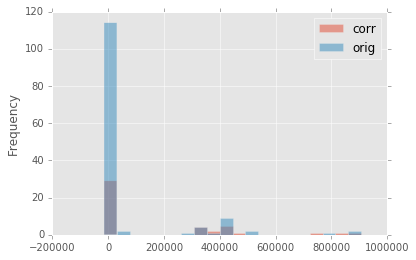

In [7]:
#print df1.columns.values
fluxes1 = df1.base_CircularApertureFlux_50_0_flux
fluxes2 = df2.base_CircularApertureFlux_50_0_flux
fluxes1 = np.append(fluxes1, np.repeat(np.nan, len(fluxes2)-len(fluxes1)))
print len(fluxes2),len(fluxes1)
df = pd.DataFrame({'corr': fluxes1, 'orig': fluxes2})
df.plot.hist(alpha=0.5, bins=20)

Find matches between the two catalogs in RA and Dec.

In [8]:
dist = np.sqrt(np.add.outer(df1.coord_dec, -df2.coord_dec)**2. + \
               np.add.outer(df1.coord_ra, -df2.coord_ra)**2.) * 206264.806247  # convert to arcsec ?
print dist.min(), np.unravel_index(np.argmin(dist), dist.shape), dist[18,48]
print df1.iloc[18].coord_dec, df1.iloc[18].coord_ra, '\t', df2.iloc[48].coord_dec, df2.iloc[48].coord_ra
print np.sum(dist < 4.)
matches = np.where(dist < 4.)
#print matches
print dist[0,0], df1.iloc[0].coord_dec, df1.iloc[0].coord_ra, '\t', df2.iloc[0].coord_dec, df2.iloc[0].coord_ra

matches1 = df1.iloc[matches[0]]
matches2 = df2.iloc[matches[1]]

fluxes1 = matches1.base_CircularApertureFlux_50_0_flux.values
fluxes2 = matches2.base_CircularApertureFlux_50_0_flux.values

fluxSigs1 = matches1.base_CircularApertureFlux_50_0_fluxSigma.values
fluxSigs2 = matches2.base_CircularApertureFlux_50_0_fluxSigma.values

isgood = ~np.isnan(fluxes1) & ~np.isnan(fluxes2)
isgood2 = ~np.isnan(fluxes1) & ~np.isnan(fluxes2) & ~np.isnan(fluxSigs1) & ~np.isnan(fluxSigs2)

fluxes1 = fluxes1[isgood]
fluxes2 = fluxes2[isgood]
fluxSigs1 = np.sqrt(fluxSigs1[isgood2])
fluxSigs2 = np.sqrt(fluxSigs2[isgood2])

0.00174137799121 (18, 48) 0.00174137799121
-0.104489022363 2.71678934598 	-0.104489013982 2.71678934699
45
0.0063943728011 -0.104245305196 2.71568871571 	-0.104245278038 2.71568870076


[   0.95530517  633.50516061] [  1.81661127e-03   5.27274024e+02]
0.958939525235
[  1.16808636  17.44637564] [  1.64530721e-03   1.06930292e+01]
1.17090777116
[ 0.7592695   1.72245297] [ 0.03615017  3.40916909]
0.818869285598


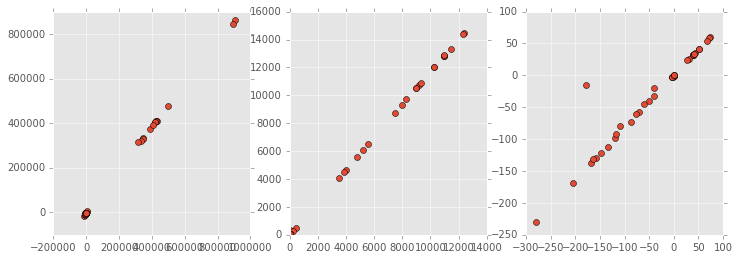

In [9]:
pars, cov = np.polyfit(fluxes2, fluxes1, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxes2, fluxes1)
print np.median(fluxes1/fluxes2)

pars, cov = np.polyfit(fluxSigs2, fluxSigs1, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxSigs2, fluxSigs1)
print np.median(fluxSigs1/fluxSigs2)

pars, cov = np.polyfit(fluxes2/fluxSigs2, fluxes1/fluxSigs1, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxSigs2, fluxSigs1)
print np.median((fluxes1/fluxSigs1)/(fluxes2/fluxSigs2))

plt.figure(1, (12,4))
plt.subplot(131)
plt.plot(fluxes2, fluxes1, 'o')
plt.subplot(132)
plt.plot(fluxSigs2, fluxSigs1, 'o')
plt.subplot(133)
plt.plot(fluxes2/fluxSigs2, fluxes1/fluxSigs1, 'o')

In [10]:
df1.columns.values

array(['base_CircularApertureFlux_12_0_flag',
       'base_CircularApertureFlux_12_0_flag_apertureTruncated',
       'base_CircularApertureFlux_12_0_flux',
       'base_CircularApertureFlux_12_0_fluxSigma',
       'base_CircularApertureFlux_17_0_flag',
       'base_CircularApertureFlux_17_0_flag_apertureTruncated',
       'base_CircularApertureFlux_17_0_flux',
       'base_CircularApertureFlux_17_0_fluxSigma',
       'base_CircularApertureFlux_25_0_flag',
       'base_CircularApertureFlux_25_0_flag_apertureTruncated',
       'base_CircularApertureFlux_25_0_flux',
       'base_CircularApertureFlux_25_0_fluxSigma',
       'base_CircularApertureFlux_35_0_flag',
       'base_CircularApertureFlux_35_0_flag_apertureTruncated',
       'base_CircularApertureFlux_35_0_flux',
       'base_CircularApertureFlux_35_0_fluxSigma',
       'base_CircularApertureFlux_3_0_flag',
       'base_CircularApertureFlux_3_0_flag_apertureTruncated',
       'base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated',

In [11]:
print np.mean(df1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(df2.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches2.ip_diffim_DipoleFit_flag_classification.values)
print;
print np.mean(df1.ip_diffim_ClassificationDipole_value)
print np.mean(df2.ip_diffim_ClassificationDipole_value)
print np.mean(matches1.ip_diffim_ClassificationDipole_value)
print np.mean(matches2.ip_diffim_ClassificationDipole_value)

0.893617021277
0.832167832168
0.933333333333
0.866666666667

0.148936170213
0.0559440559441
0.155555555556
0.155555555556


Let's try to make the plot in Colin's DMTN-006 -- first run his script

```
python forcePhotDiaSources.py decamDirTest --output decamDirTest/ --id visit=289820 ccdnum=11 --templateId visit=288976 --no-versions
```

then...

In [16]:
import lsst.daf.persistence as dp
butler=dp.Butler('decamDirTest')
sources=butler.get('forced_src',visit=289820,ccdnum=11)
df = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
df.head()

,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,classification_dipole,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,False,False,False,11404.520674,89.066383,False,1397.284668,36.975662,0,-0.104245,2.715689,NaN,NaN,124476789417312315,0,12969.952693,82.887033
1,False,False,False,17290.391676,148.626551,False,762.296021,81.918915,0,-0.103438,2.715746,-972.049185,183.176581,124476789417312316,0,19571.310538,93.141193
2,False,False,False,7463.117589,79.908278,False,461.615814,167.571503,0,-0.103056,2.715855,540.369280,118.492729,124476789417312317,0,6758.717727,67.985277
3,False,False,False,36794.543902,117.443060,False,613.144470,209.583069,0,-0.103248,2.715909,896.632105,174.397423,124476789417312318,0,33419.925916,109.588756
4,False,False,False,18082.621636,101.537051,False,780.100464,412.826782,0,-0.103460,2.716169,1237.985849,156.828121,124476789417312319,0,18546.846097,155.216630


In [17]:
df[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df['s_to_n'] = df.base_PsfFlux_flux / df.base_PsfFlux_fluxSigma
df['template_s_to_n'] = df.template_base_PsfFlux_flux / df.template_base_PsfFlux_fluxSigma
print df.columns.values
df[['s_to_n', 'template_s_to_n']].head()

['base_PsfFlux_flag' 'base_PsfFlux_flag_edge'
 'base_PsfFlux_flag_noGoodPixels' 'base_PsfFlux_flux'
 'base_PsfFlux_fluxSigma' 'base_TransformedCentroid_flag'
 'base_TransformedCentroid_x' 'base_TransformedCentroid_y'
 'classification_dipole' 'coord_dec' 'coord_ra' 'diffim_base_PsfFlux_flux'
 'diffim_base_PsfFlux_fluxSigma' 'objectId' 'parentObjectId'
 'template_base_PsfFlux_flux' 'template_base_PsfFlux_fluxSigma' 's_to_n'
 'template_s_to_n']


,s_to_n,template_s_to_n
0,128.045176,156.477464
1,116.334474,210.125187
2,93.396050,99.414432
3,313.296876,304.957617
4,178.088899,119.490071


Make a plot similar to Colin's [Figure 6 in DMTN-006](http://dmtn-006.lsst.io/en/latest/#forcephot-sci-template-v197367)

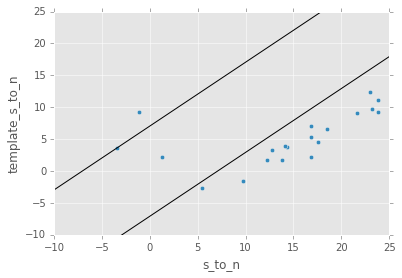

In [18]:
df.plot.scatter('s_to_n', 'template_s_to_n')
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')